In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os, codecs
import jieba
from collections import Counter
import webbrowser
import urllib.request  
import re

In [2]:
path = '~/Downloads/wechat_data_analysis/WeChat_Article_Tracker1.csv'

In [3]:
wechat = pd.read_csv(path,
                    header = 1,index_col = 'Date')
wechat.head()

,Article Title,Page View,Share,Like,Read More,Open Rate
Date,,,,,,
10/1/17,在2017甲骨文全球大会体验云的未来,1823,129,17,39.0,32.6%
10/2/17,甲骨文推出全球首款100%“无人驾驶”数据库：Oracle自治式数据,3826,360,29,68.0,17.6%
10/3/17,未来已来 | 直击2017甲骨文全球大会,1265,62,8,14.0,49.5%
10/4/17,现场直击 | 什么是真正云时代的数据库,673,33,6,11.0,60.9%
10/5/17,现场直击 | 展望Oracle下一代SaaS应用,1495,94,10,11.0,39.1%


In [4]:
text1129 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265543&idx=1&sn=06da1e68b4e3731618e599ab46f846c1&chksm=bd7ec0588a09494e9716aa3022e08654427e17f135b84d9277685b4d68d06100f651b5a3dfb0#rd'
text1127 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265527&idx=1&sn=7df3b3caab21c5a10cf8d8b5fc16eadb&chksm=bd7ec0288a09493e4056947373f77fdbb17e5c6a2f040edf733a88da588cfa5355f9923a9fa6#rd'
text1126 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265522&idx=1&sn=b1936d0a317ce7dc91f2ea7cc15ce388&chksm=bd7ec02d8a09493b7d5717e63fe4ac03e64733e3906d682235f6ea924aa3c7db380a34f1c448#rd'
text1123 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265517&idx=1&sn=9a0b88c3f35d256dc66b8e07a09425f4&chksm=bd7ec0328a094924802735fe294560674f3c42cb0c85ee0ed561802560ed286a7a53a46d5bea#rd'
text1122 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265500&idx=1&sn=ffe1f689c0f00fcb186961477c185c8e&chksm=bd7ec0038a0949151a3fd76cac09d21674255ea192f2f96667a49b0b6b1a4a92bab5d6b01c09#rd'
text1119 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265487&idx=1&sn=91347ced779bc49edf68633254f7b2f9&chksm=bd7ec0108a094906c07a31742cff7190921c048d2419fbf63762ee4c69af377d05e2ce035493#rd'
text1116 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265465&idx=1&sn=0e71c9476aee7e960ccbbd71b5cbe771&chksm=bd7ec7e68a094ef07907be0b153e13bb7fad8b4605f4c51d824079c0d968ba10419da3e1acb4#rd'
text1115 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265456&idx=1&sn=5ecdd2998736b8132857715c0fd72a45&chksm=bd7ec7ef8a094ef9c82c737018de80bed69c9127ef025e0c3449e442f246705e269322400aa9#rd'
text1114 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265456&idx=1&sn=5ecdd2998736b8132857715c0fd72a45&chksm=bd7ec7ef8a094ef9c82c737018de80bed69c9127ef025e0c3449e442f246705e269322400aa9#rd'
text1113 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265418&idx=1&sn=aeb927686035850de7bc6287af98b3d6&chksm=bd7ec7d58a094ec30589ac4ba1111278b0537807a2a14b34344a2d4e11158af499ee712bb8e1#rd'
text1112 = 'https://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265397&idx=1&sn=5dc127b91798177601a8b085279a83a2&chksm=bd7ec7aa8a094ebc59096a94cb862ec7d76d75087721dd50942cfc699a86806a2f732d23ea0c#rd'
text1109 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265390&idx=1&sn=40a10f33ebae701214e6e6b7c64781d7&chksm=bd7ec7b18a094ea7f5414dc39c6de1130079226d135247e1340debb650725106b898f6d267e9#rd'
text1107 = 'https://mp.weixin.qq.com/s/Q1kyFcMQ6PRgeUvCHKnMsw'
text1106 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265376&idx=1&sn=09f61d43e3191e3e526346980270f904&chksm=bd7ec7bf8a094ea9e5f73fb83a4185c9874c613acdbe01b656c803e4fca1f3039f774fc371ba#rd'
text1105 = 'https://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265371&idx=1&sn=c82a9389b07a771a3c009874b2946347&chksm=bd7ec7848a094e925bf243e9d21aab5db5cee2bedb0f24241988209898f90fef167ff5b0a357#rd'
text1102 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265364&idx=1&sn=9ae0e2988f938d89fb8c0c3f40a09ef6&chksm=bd7ec78b8a094e9d3db1fcb89831f1de52ede21a706bbd8f3b315b36b37cc62d505770c10d80#rd'
text1101 = 'https://mp.weixin.qq.com/s/HSvRZ0nn_tl56VrRcd75Hw'
text1031 = 'http://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265354&idx=1&sn=d8c5fc838ef32adc933e25fd21ff36e2&chksm=bd7ec7958a094e83f3bba7e4158178092734f3a432d6461c97f7f889d5b1e8ccda800f427851#rd'
text1030 = 'https://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265342&idx=1&sn=f3f54f838572a94a82b51b34fb9ce62e&chksm=bd7ec7618a094e77376c140aacc48836e2b8e11836900611af63104850e58b799acc80112e75#rd'
text1029 = 'https://mp.weixin.qq.com/s?__biz=MjM5MzA5OTEyMA==&mid=2652265338&idx=1&sn=d480bc8591c66cfff598b808bdd7e6d7&chksm=bd7ec7658a094e73e0dc641ef738e1b31bbb156d3c460c3c6b71ed1b31bf69b75494207fe6b5#rd'

textlst = [text1029, text1030, text1031, text1101, text1102, text1105, text1106, text1107, text1109, text1112, text1113, text1114, text1115, text1116, text1119, text1122, text1123, text1126, text1127, text1129]
textstr = ['text1029', 'text1030', 'text1031', 'text1101', 'text1102', 'text1105', 'text1106', 'text1107', 'text1109', 'text1112', 'text1113', 'text1114', 'text1115', 'text1116', 'text1119', 'text1122', 'text1123', 'text1126', 'text1127', 'text1129']

for i in range(len(textlst)):
    urllib.request.urlretrieve(textlst[i], textstr[i] + ".txt")
    

In [5]:
def Chinese(text):
    cleaned = re.findall(r'[\u4e00-\u9fa5]+', text)  #返回列表
    cleaned = ''.join(cleaned)                      #拼接成字符串
    return cleaned

def get_words(txt):
    seg_list = jieba.cut(txt)
    c = Counter()
    for x in seg_list:
        x = Chinese(x)
        if len(x)>1 and x != '\r\n':
            c[x] += 1
#     print('常用词频度统计结果')
    dict = {}
    for (k,v) in c.most_common(20):
        dict[k] = v
        print(k, v)
    print(dict)

if __name__ == '__main__':
    with codecs.open('text1029.txt', 'r', 'utf-8') as f:
        txt = f.read()
    get_words(txt)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/25/g3z7jz4s1pl0vkqv10jpw9sm0000gn/T/jieba.cache
Loading model cost 0.846 seconds.
Prefix dict has been built succesfully.


微软 37
雅黑 37
甲骨文 17
数字化 15
转型 13
中国 12
企业 12
侨鑫 12
百洋 11
集团 11
海能 7
喜获 5
客户 5
付钢 5
领军者 5
营销 5
通过 5
成为 5
解决方案 5
看一看 5
{'微软': 37, '雅黑': 37, '甲骨文': 17, '数字化': 15, '转型': 13, '中国': 12, '企业': 12, '侨鑫': 12, '百洋': 11, '集团': 11, '海能': 7, '喜获': 5, '客户': 5, '付钢': 5, '领军者': 5, '营销': 5, '通过': 5, '成为': 5, '解决方案': 5, '看一看': 5}


In [6]:
df = wechat.tail(20)
df = df.drop(['Share', 'Like', 'Read More', 'Open Rate'], axis=1)

In [7]:
commonword = ['甲骨文',
'中国',
'客户',
'自治',
'营销',
'企业',
'数据',
'通过',
'创新',
'技术',
'业务',
'科技',
'大会',
'取消',
'分享',
'行业',
'转型']

In [8]:
for word in commonword:
    col=[]
    for txtstr in textstr:
        with codecs.open(txtstr + '.txt', 'r', 'utf-8') as f:
            txt = f.read()
        seg_list = jieba.cut(txt)
        c = Counter()
        for x in seg_list:
            x = Chinese(x)
            if len(x)>1 and x != '\r\n':
                c[x] += 1
        dict = {}
        for (k,v) in c.most_common(50):
            dict[k] = v
#             print(k, v)
        try:
            col.append(dict[word])
        except KeyError:
            col.append(0)
#         print(col)
    df[word] = col

In [9]:
textlen = []
for i in textstr:
    with codecs.open( i + '.txt', 'r', 'utf-8') as f:
            txt = f.read()
            textlen.append(len(txt))

In [10]:
df['Article Length'] = textlen
df

,Article Title,Page View,甲骨文,中国,客户,自治,营销,企业,数据,通过,创新,技术,业务,科技,大会,取消,分享,行业,转型,Article Length
Date,,,,,,,,,,,,,,,,,,,,
10/29/18,甲骨文助力中国企业数字化转型，百洋、侨鑫、海能达喜获IDC大奖,866,17,12,5,0,5,12,0,5,0,3,0,0,0,4,4,3,13,119802
10/30/18,这些企业的数字化转型，为什么选择Oracle？,758,13,10,11,0,0,21,28,8,0,13,12,0,0,0,0,10,11,161880
10/31/18,万圣节？！…… IT不要惊惊惊惊惊魂夜！,693,6,5,0,5,0,3,2,0,0,0,0,0,0,4,4,0,0,109905
11/1/18,灵·全·快 驭未来 | 2018 甲骨文云大会最全预告，开幕在即,282,11,5,0,0,0,0,0,0,0,0,0,0,7,4,4,0,0,109126
11/2/18,驾驭大数据之剑，解锁跨境电商成功秘诀,258,6,5,0,0,0,0,10,0,0,0,5,6,0,4,5,0,0,116308
11/5/18,大数据一浪接一浪，企业被狠狠拍在沙滩上？,908,9,6,0,0,0,19,42,5,0,3,7,0,0,4,5,0,0,161636
11/6/18,快！闪！开！Oracle NetSuite中国峰会H5来惹~,612,6,9,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,107439
11/7/18,灵·全·快 驭未来 | 2018甲骨文云大会赞助商,700,11,5,1,0,0,0,0,0,0,0,0,0,5,4,4,0,0,103099
11/9/18,Hi，首秀预告来啦 | 2018 Oracle NetSuite中国峰会,740,6,10,2,0,0,0,0,0,0,0,0,2,3,4,4,0,0,133527


The correlation between page view and 甲骨文词频 is 0.61


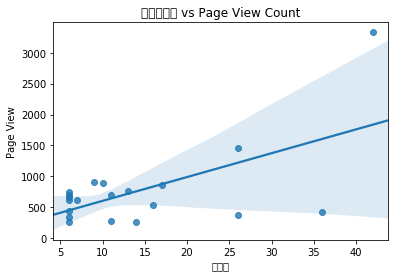

In [11]:
甲骨文 = df['甲骨文']
view = df['Page View']
sns.regplot(x="甲骨文", y="Page View", data=df)
plt.title("甲骨文词频 vs Page View Count")
corr0float = np.corrcoef(view, 甲骨文)[0][1]
corr0 = "%.2f" % corr0float
print("The correlation between page view and 甲骨文词频 is " + corr0)

The correlation between page view and 中国词频 is 0.41


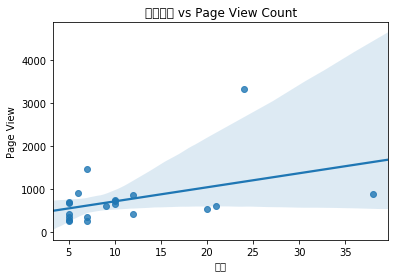

In [12]:
中国 = df['中国']
view = df['Page View']
sns.regplot(x="中国", y="Page View", data=df)
plt.title("中国词频 vs Page View Count")
corr2float = np.corrcoef(view, 中国)[0][1]
corr2 = "%.2f" % corr2float
print("The correlation between page view and 中国词频 is " + corr2)

The correlation between page view and article length is 0.47


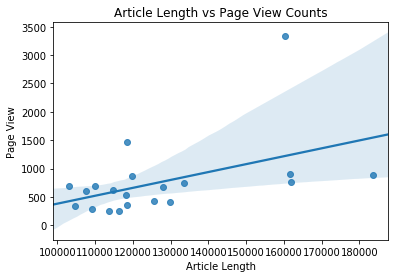

In [13]:
artlen = df['Article Length']
sns.regplot(x="Article Length", y="Page View", data=df)
plt.title("Article Length vs Page View Counts")
corr1float = np.corrcoef(view, artlen)[0][1]
corr1 = "%.2f" % corr1float
print("The correlation between page view and article length is " + corr1)